In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import walk
from math import ceil

In [49]:
def requests_average(prometheus_id):
    path=str(prometheus_id)+'/time'
    avg = []
    for (dirpath, dirname, filenames) in walk(path):
        for file in filenames:
            with open(path+"/"+file) as f:
                avg.append(float(f.read().strip('Avg: \n')))
    return avg;


def cpu_usage(prometheus_id):
    path=str(prometheus_id)+'/cpu'
    A = []
    for (dirpath, dirname, filenames) in walk(path):
        for f in filenames:
            A.append(f)
    A.sort()
    cpu_usage = []
    for sf in A:
        with open(path+"/"+sf) as f:
            file=f.read()
            loc_cpu = file.find("CPU")
            loc_n = file.find("\n")
            loc_percent = file.find("%", loc_n)
            cpu_usage.append(float(file[loc_cpu+loc_n+1:loc_percent]))
    return cpu_usage


def mem_usage(prometheus_id):
    path=str(prometheus_id)+'/cpu'
    A = []
    for (dirpath, dirname, filenames) in walk(path):
        for f in filenames:
            A.append(f)
    A.sort()
    mem_usage = []
    for sf in A:
        with open(path+"/"+sf) as f:
            file=f.read()
            loc_mem = file.find("MEM")
            loc_n = file.find("\n")
            loc_slash = file.find("/", loc_n)
            mem_usage.append(float(file[loc_mem+loc_n+1:loc_slash-4]))
    return mem_usage


def storage_disk(prometheus_id):
    path=str(prometheus_id)+'/disk'
    A = []
    for (dirpath, dirname, filenames) in walk(path):
        for f in filenames:
            A.append(f)

    A.sort()
    disk_usage = []
    for sf in A:
        with open(path+"/"+sf) as f:
            disk_usage.append(int(f.read().strip('. \n\t')))
    return disk_usage


def compile_data(version, id_numbers, function):
    proms = {}
    proms_data = []
    proms_diff = []
    proms_length = []
    prom_diff = {}
    prom_data = []
    prom_mean = []
    for i in id_numbers:
        data = function(i)
        proms_length.append(len(data))
        proms['Prometheus '+version+': '+str(i)] = data
        prom_data.append(data)
        proms_data.extend(data)
        diff = []
        for x in range(1,len(data)):
            diff.append(data[x] - data[x-1])
        prom_diff['Prometheus '+version+': '+str(i)] = diff
        proms_diff.extend(diff)
    for i in range(0,np.min(proms_length)):
        soma = 0
        for p in prom_data:
            soma += p[i]
        prom_mean.append(soma/len(prom_data))
    return dict({'proms': proms,
            'proms_data': proms_data,
            'proms_diff': proms_diff,
            'proms_length': proms_length,
            'prom_diff': prom_diff,
            'prom_data': prom_data,
            'prom_mean': prom_mean,
            'ids': id_numbers,
            'version': version})

In [70]:
id2_415s = ['8173f0be86ae', '041f98f44920', '0e39b766929f', '49f3bf12eb86']
id2_815s = ['a7d7e5574030', 'cd95d4bbd94f', 'bd5eb7b2282e', 'a48a5e9b5e32']
id2_4 = ['4845033b52bb', '62ccdd28bcb7', 'c81aac581b32', 'e6b642c4b802']
id2_8 = ['2b39efff5bd2', '857ad97971ed', '9f2e0173fdc6', 'b3e8eb164a89']

req_avg = {'2.4': compile_data('2.4', id2_4+id2_415s, requests_average),
           '2.8': compile_data('2.8', id2_8+id2_815s, requests_average)}

cpu = {'2.4': compile_data('2.4', id2_4, cpu_usage),
       '2.8': compile_data('2.8', id2_8, cpu_usage)}

mem = {'2.4': compile_data('2.4', id2_4, mem_usage),
       '2.8': compile_data('2.8', id2_8, mem_usage)}

storage = {'2.4': compile_data('2.4', id2_4, storage_disk),
           '2.8': compile_data('2.8', id2_8, storage_disk)}

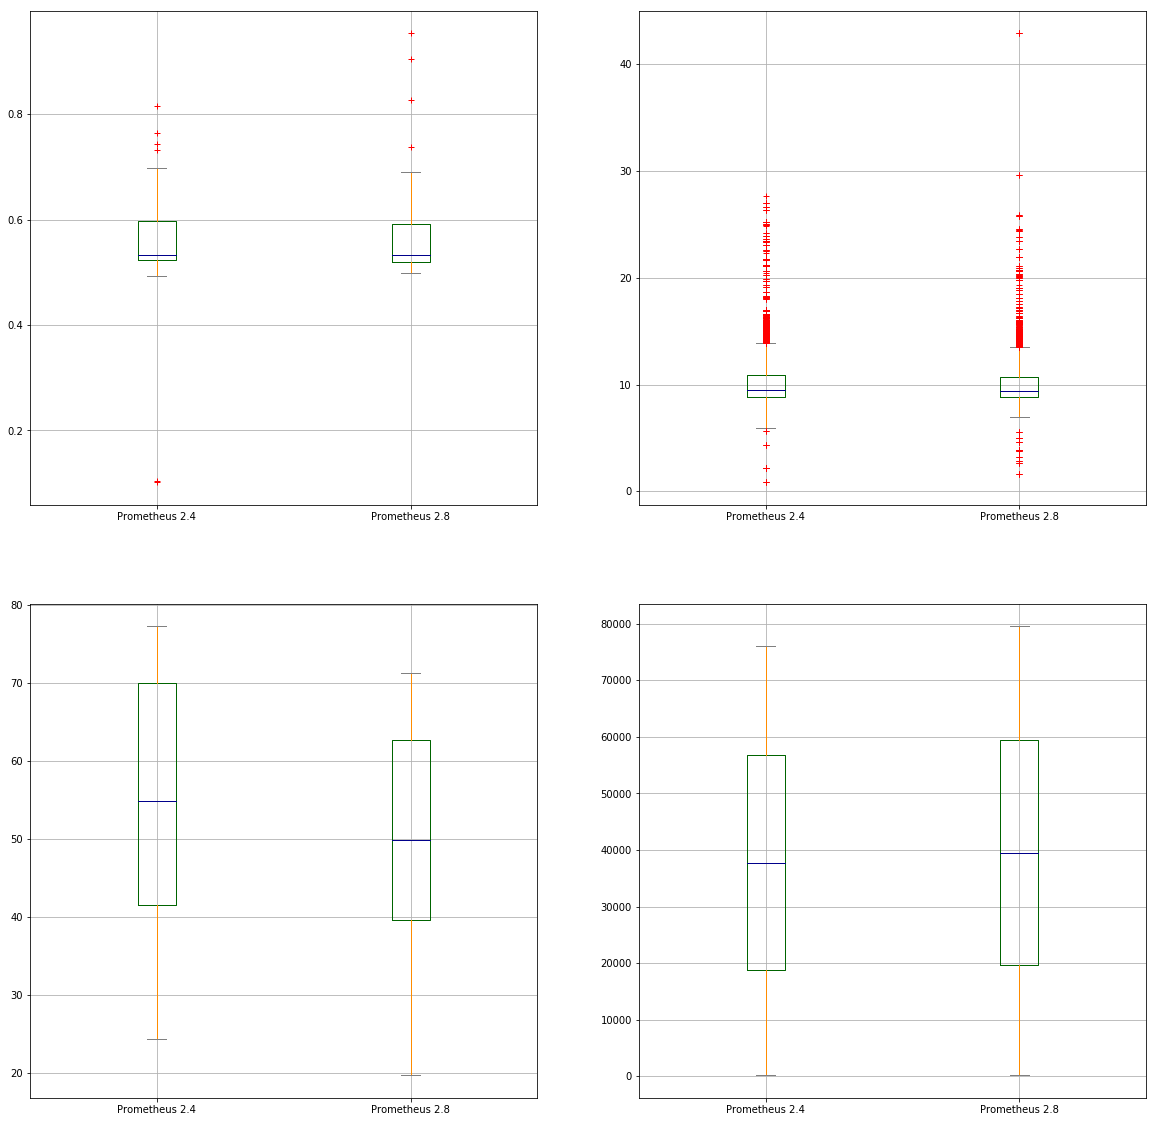

In [74]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
pd.DataFrame({'Prometheus 2.4': req_avg['2.4']['proms_data'], 'Prometheus 2.8': req_avg['2.8']['proms_data']}).plot(ax=axes[0,0], kind='box', color=color, sym='r+', grid=True)
pd.DataFrame({'Prometheus 2.4': cpu['2.4']['proms_data'], 'Prometheus 2.8': cpu['2.8']['proms_data']}).plot(ax=axes[0,1], kind='box', color=color, sym='r+', grid=True)
pd.DataFrame({'Prometheus 2.4': mem['2.4']['proms_data'], 'Prometheus 2.8': mem['2.8']['proms_data']}).plot(ax=axes[1,0], kind='box', color=color, sym='r+', grid=True)
pd.DataFrame({'Prometheus 2.4': storage['2.4']['proms_data'], 'Prometheus 2.8': storage['2.8']['proms_data']}).plot(ax=axes[1,1], kind='box', color=color, sym='r+', grid=True)

In [80]:
print(req_avg)


{'2.4': {'proms': {'Prometheus 2.4: 4845033b52bb': [0.5286726, 0.5295474, 0.5260636, 0.5199085, 0.6180674, 0.522855, 0.5315733], 'Prometheus 2.4: 62ccdd28bcb7': [0.5467505, 0.5307144, 0.5378062, 0.5293883, 0.5352112, 0.5316682, 0.5373426], 'Prometheus 2.4: c81aac581b32': [0.534794, 0.5325173, 0.521889, 0.5232654, 0.534606, 0.5216676, 0.5514969], 'Prometheus 2.4: e6b642c4b802': [0.5233125, 0.5192729, 0.5241266, 0.530965, 0.5333298, 0.52781, 0.5227096], 'Prometheus 2.4: 8173f0be86ae': [0.5931171, 0.6637887, 0.7640218, 0.10395441, 0.645599, 0.6492346, 0.10149241], 'Prometheus 2.4: 041f98f44920': [0.5779, 0.6129039, 0.6371212, 0.8164449, 0.7314376, 0.5000011, 0.641709], 'Prometheus 2.4: 0e39b766929f': [0.6183999, 0.5370381, 0.5496708, 0.5339213, 0.5254124, 0.5363448, 0.6973985], 'Prometheus 2.4: 49f3bf12eb86': [0.5276958, 0.7433952, 0.5030995, 0.6101415, 0.4983037, 0.4928494, 0.511339]}, 'proms_data': [0.5286726, 0.5295474, 0.5260636, 0.5199085, 0.6180674, 0.522855, 0.5315733, 0.5467505, 0

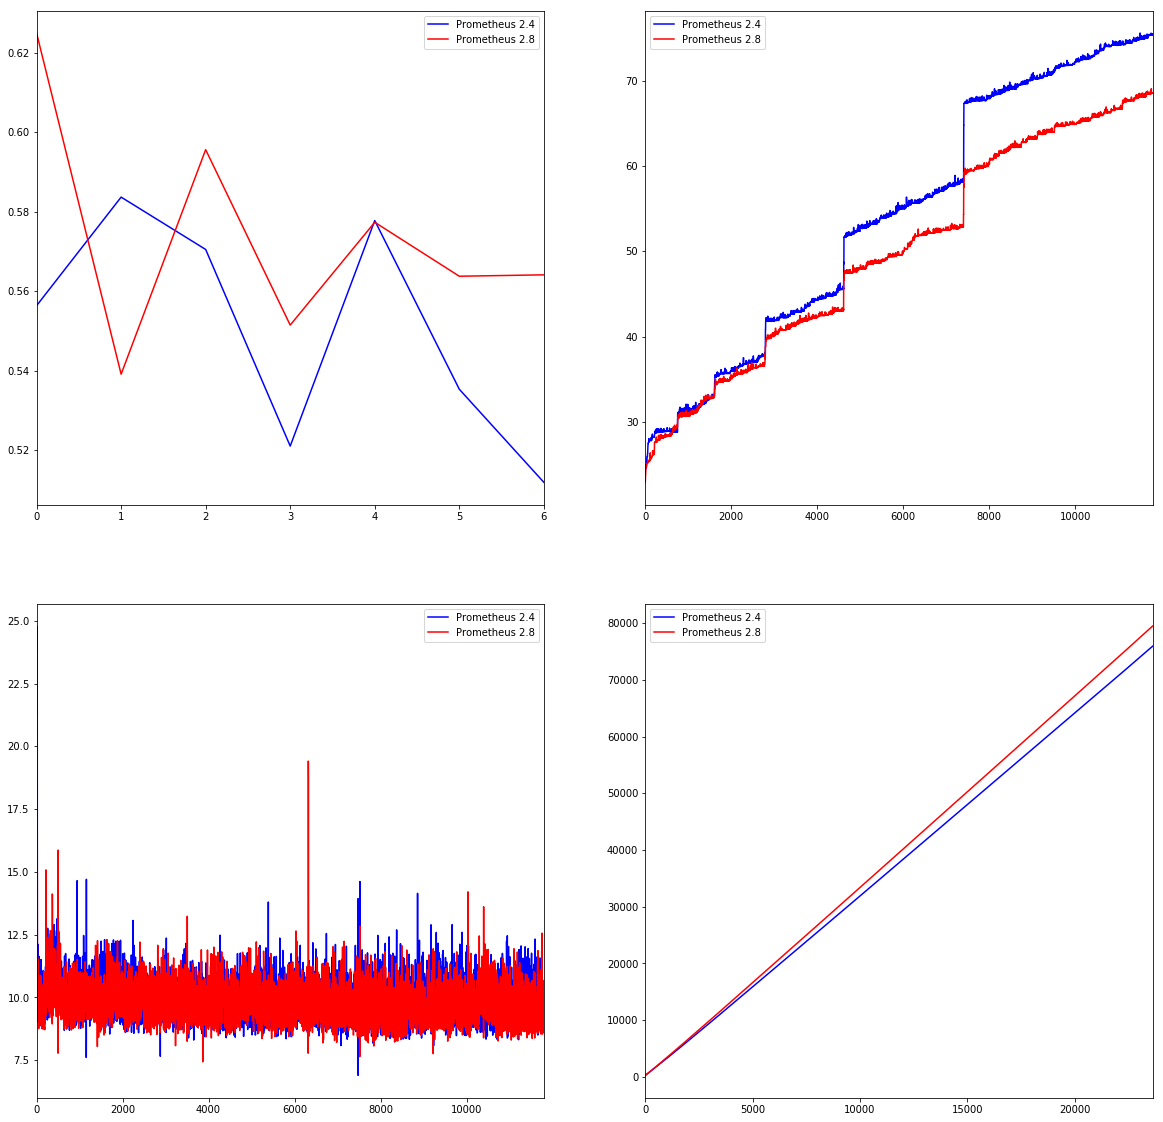

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
pd.DataFrame({'Prometheus 2.4': req_avg['2.4']['prom_mean']}).plot(ax=axes[0,0], kind='line', color='b')
pd.DataFrame({'Prometheus 2.8': req_avg['2.8']['prom_mean']}).plot(ax=axes[0,0], kind='line', color='r')

pd.DataFrame({'Prometheus 2.4': mem['2.4']['prom_mean']}).plot(ax=axes[0,1], kind='line', color='b')
pd.DataFrame({'Prometheus 2.8': mem['2.8']['prom_mean']}).plot(ax=axes[0,1], kind='line', color='r')

pd.DataFrame({'Prometheus 2.4': cpu['2.4']['prom_mean']}).plot(ax=axes[1,0], kind='line', color='b')
pd.DataFrame({'Prometheus 2.8': cpu['2.8']['prom_mean']}).plot(ax=axes[1,0], kind='line', color='r')

pd.DataFrame({'Prometheus 2.4': storage['2.4']['prom_mean']}).plot(ax=axes[1,1], kind='line', color='b')
pd.DataFrame({'Prometheus 2.8': storage['2.8']['prom_mean']}).plot(ax=axes[1,1], kind='line', color='r')


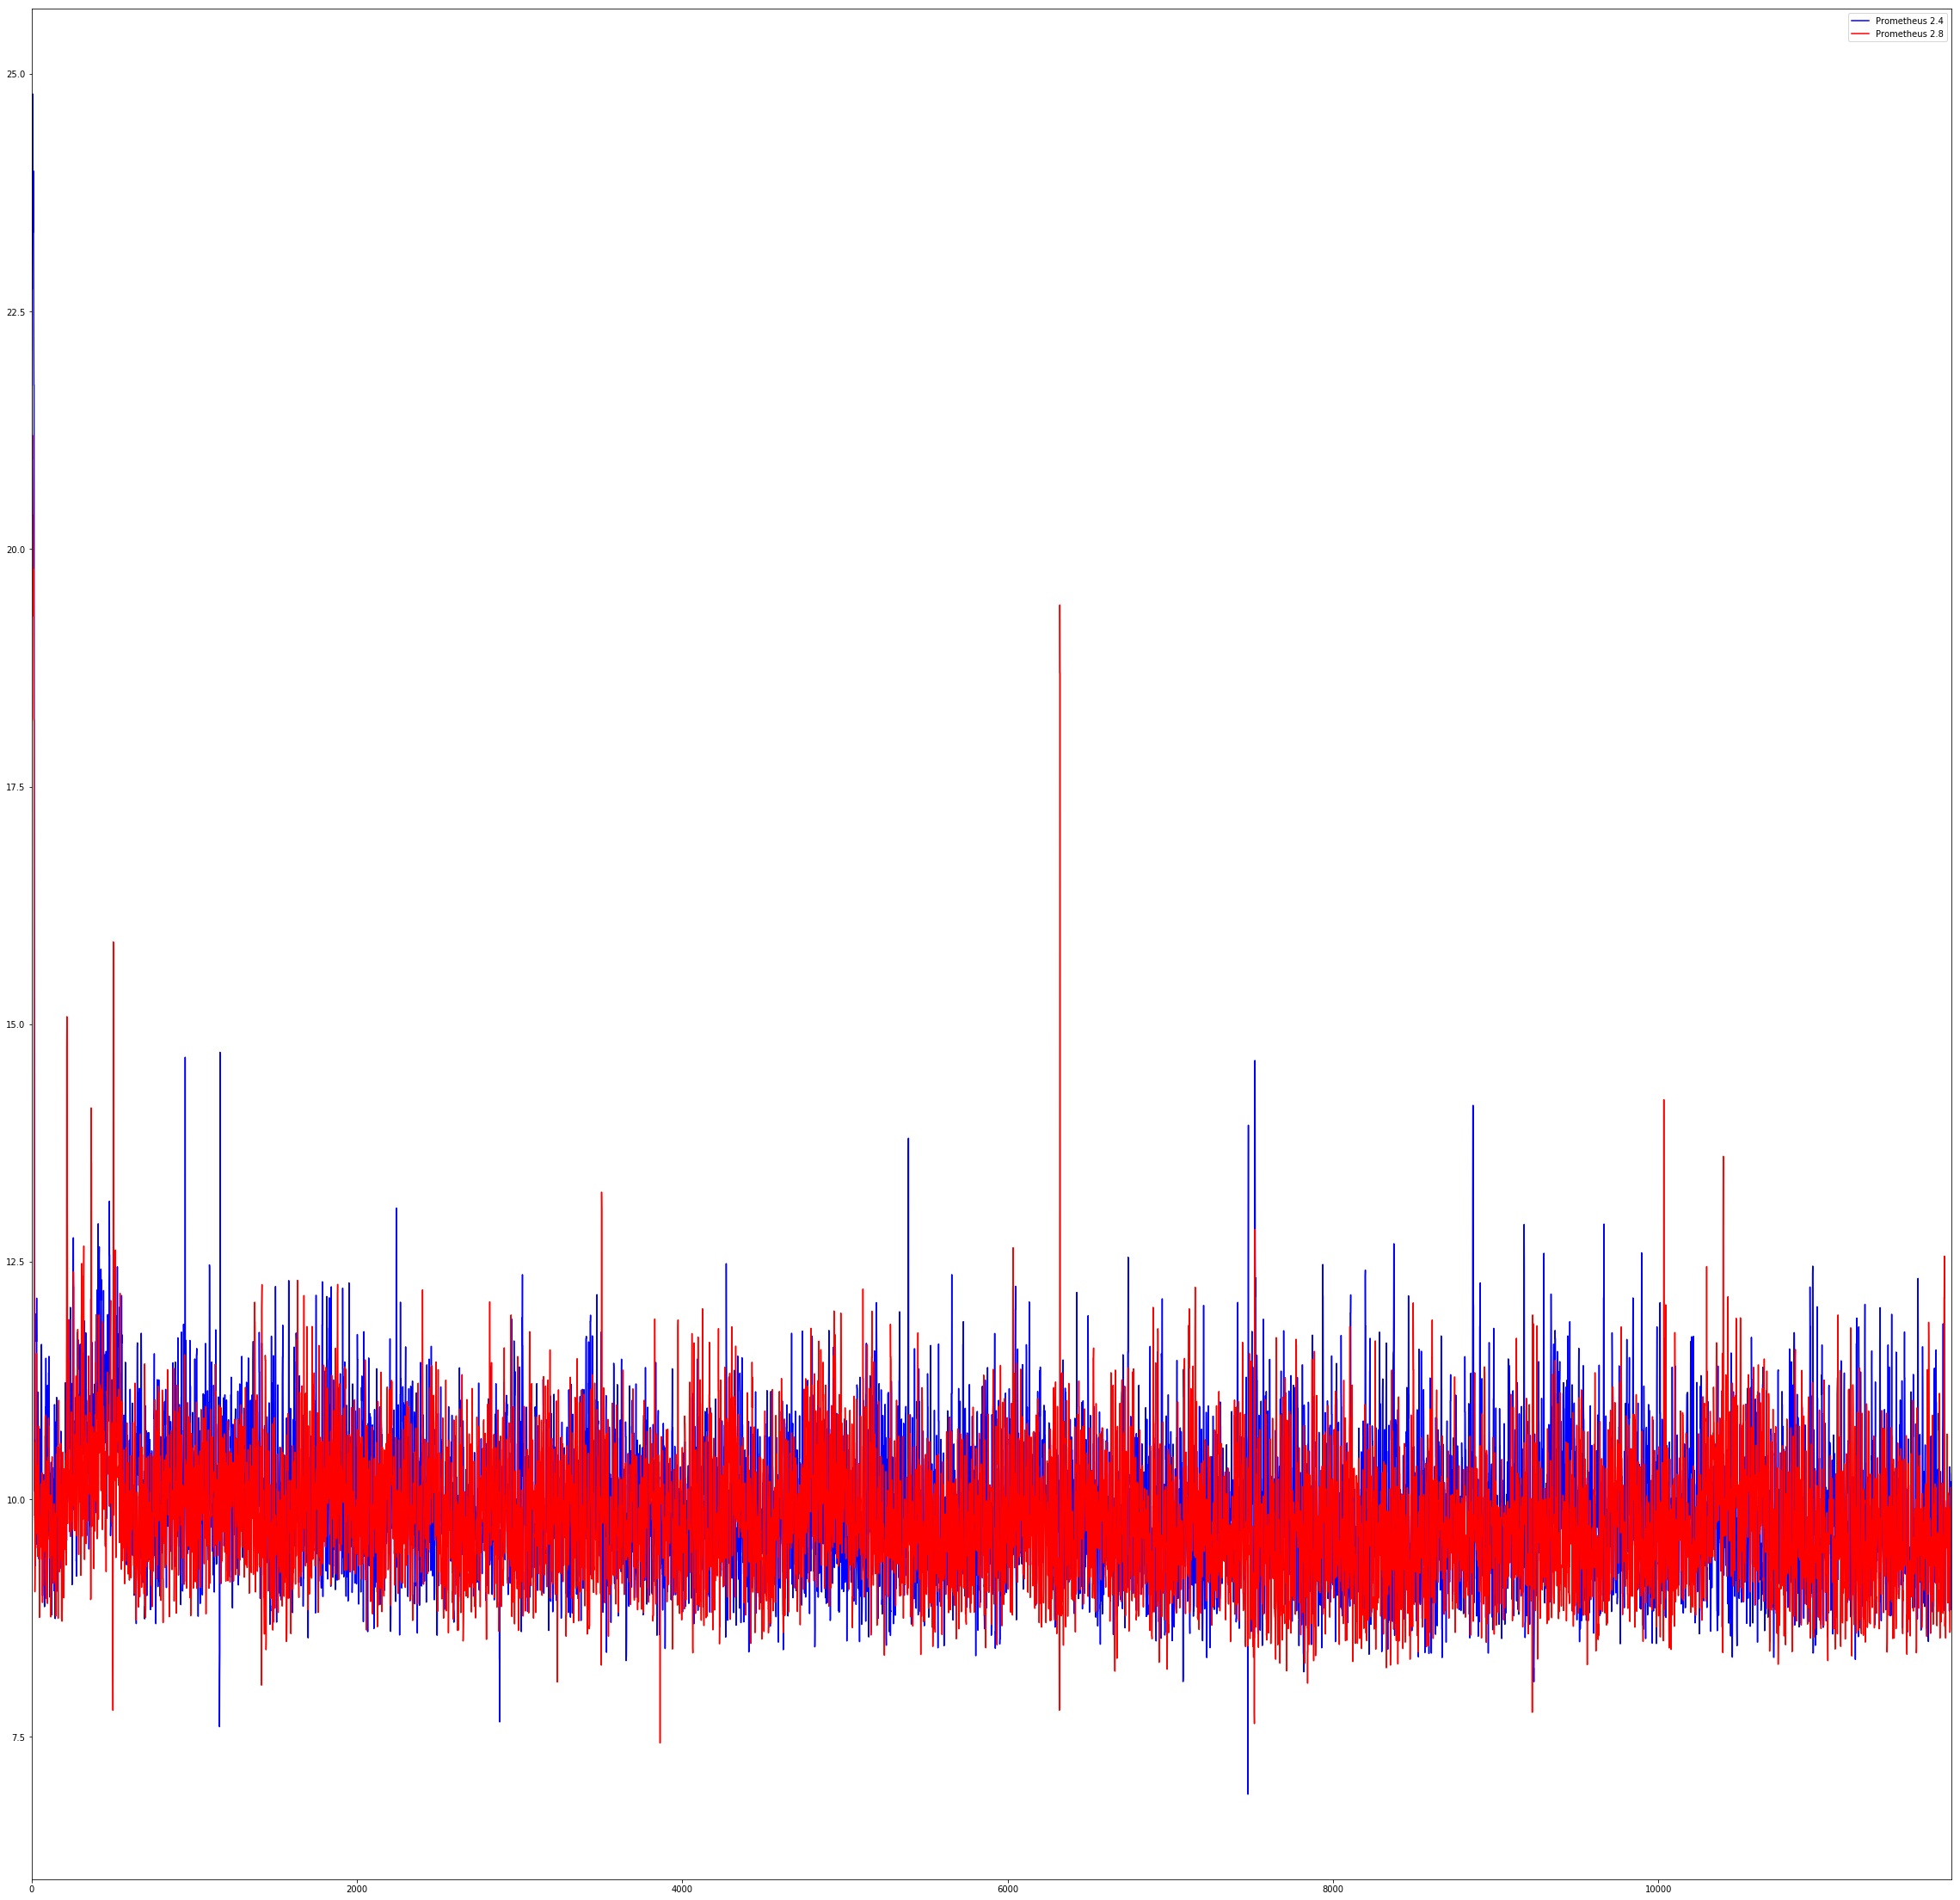

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40,40))

pd.DataFrame({'Prometheus 2.4': cpu['2.4']['prom_mean']}).plot(ax=axes, kind='line', color='b')
pd.DataFrame({'Prometheus 2.8': cpu['2.8']['prom_mean']}).plot(ax=axes, kind='line', color='r')


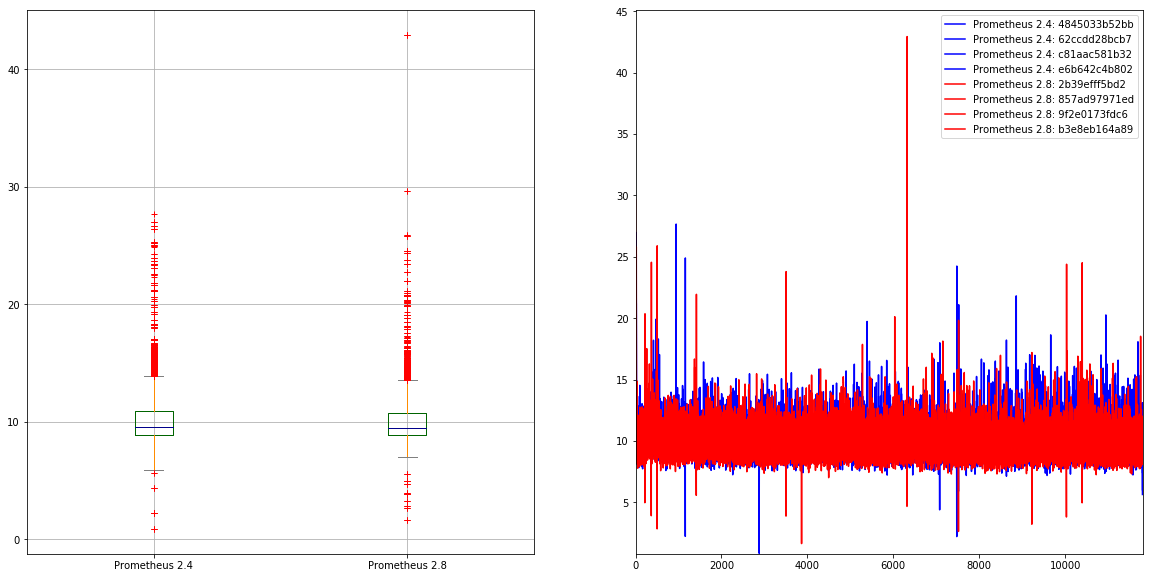

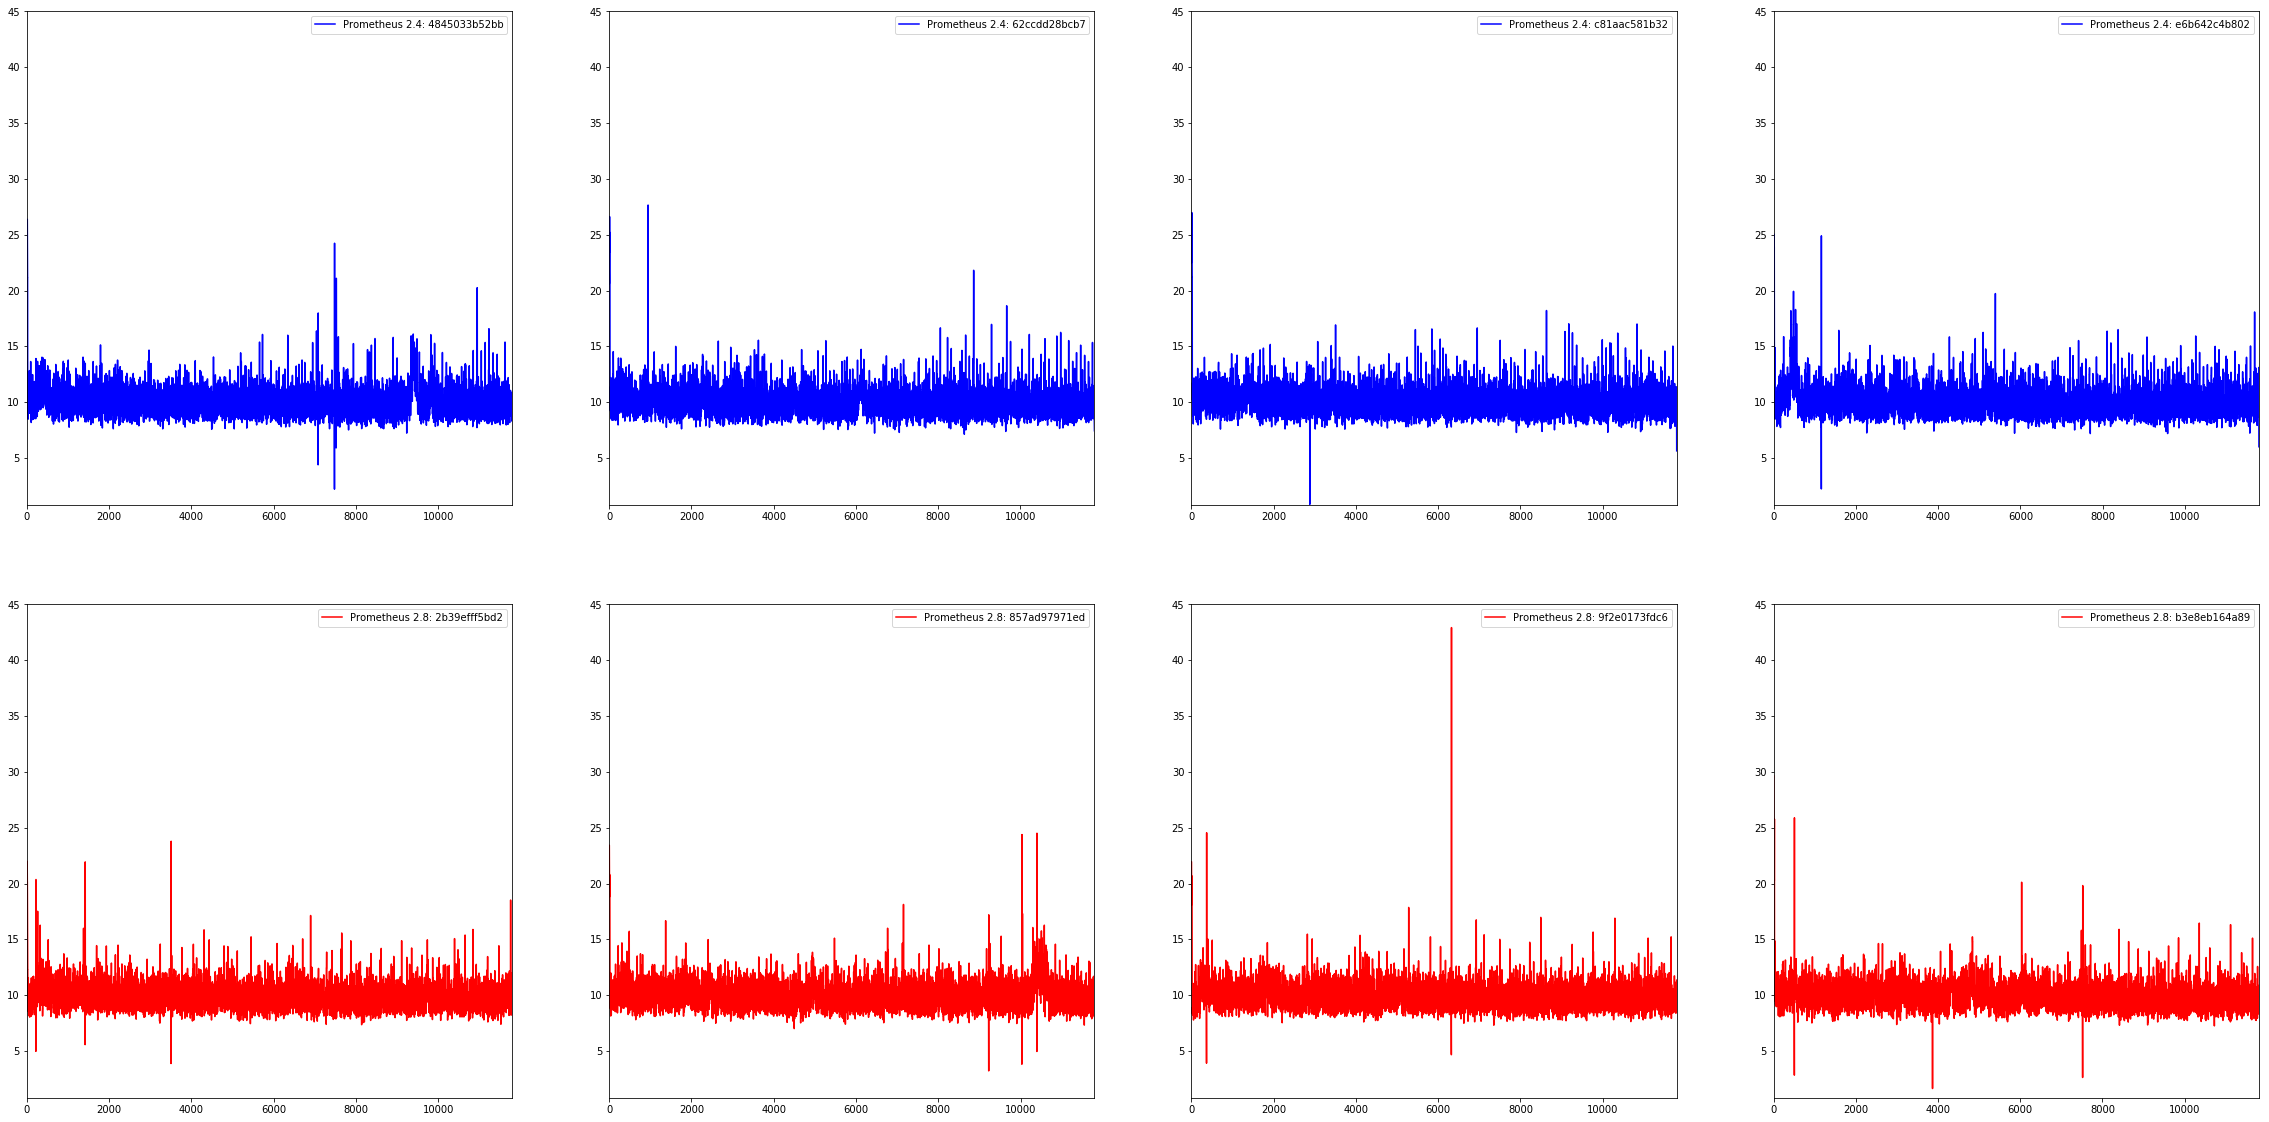

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

df_boxplot2 = pd.DataFrame({'Prometheus 2.4': prometheus2_4, 'Prometheus 2.8': prometheus2_8})
df_boxplot2.plot(kind='box', color=color, sym='r+', grid=True, ax=axes[0])

#df_boxplot2.plot(kind='hist', grid=True, ax=axes[1])

minimo2_4 = np.min(prometheus2_4)
minimo2_8 = np.min(prometheus2_8)

maximo2_4 = np.max(prometheus2_4)
maximo2_8 = np.max(prometheus2_8)

if minimo2_4 < minimo2_8:
    minimo = minimo2_4
else:
    minimo = minimo2_8

if maximo2_4 > maximo2_8:
    maximo = maximo2_4
else:
    maximo = maximo2_8

maximo *= 1.05
minimo /= 1.05

for d in diff2_4:
    ax = pd.DataFrame({d: dict2_4[d]}).plot(ax=axes[1], ylim=(minimo,maximo), color='b', kind='line')

for d in diff2_8:
    ax = pd.DataFrame({d: dict2_8[d]}).plot(ax=axes[1], ylim=(minimo,maximo), color='r', kind='line')




fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(40,20))

j=0
i=0
for d in diff2_4:
    pd.DataFrame({d: dict2_4[d]}).plot(ax=axes[j,i], color='b', ylim=(minimo,maximo), kind='line')
    i += 1

j=1
i=0
for d in diff2_8:
    pd.DataFrame({d: dict2_8[d]}).plot(ax=axes[j,i], color='r', ylim=(minimo,maximo), kind='line')
    i += 1


In [7]:
dict2_4 = {}
diff2_4 = {}
prometheus2_4 = []
proms2_4 = []
promdiff2_4 = []
sizes2_4 = []
print("Prometheus 2.4")
for i in id2_4:
    disk = storage_disk(i)
    print(len(disk))
    sizes2_4.append(len(disk))
    disk.sort()
    dict2_4['Prometheus 2.4: '+str(i)] = disk
    prometheus2_4.extend(disk)
    proms2_4.append(disk)
    diff = []
    for x in range(1,len(disk)):
        diff.append(disk[x] - disk[x-1])
    diff2_4['Prometheus 2.4: '+str(i)] = diff
    promdiff2_4.extend(diff)
    
prom_mean_2_4 = []
min2_4 = np.min(sizes2_4)
for i in range(0,min2_4):
    soma = 0
    for p in proms2_4:
        soma += p[i]
    prom_mean_2_4.append(soma/len(proms2_4))

    
dict2_8 = {}
diff2_8 = {}
prometheus2_8 = []
proms2_8 = []
promdiff2_8 = []
sizes2_8 = []
print("Prometheus 2.8")
for i in id2_8:
    disk = storage_disk(i)
    print(len(disk))
    sizes2_8.append(len(disk))
    disk.sort()
    dict2_8['Prometheus 2.8: '+i] = disk
    prometheus2_8.extend(disk)
    proms2_8.append(disk)
    diff = []
    for x in range(1,len(disk)):
        diff.append(disk[x]-disk[x-1])
    diff2_8['Prometheus 2.8: '+str(i)] = diff
    promdiff2_8.extend(diff)

prom_mean_2_8 = []
min2_8 = np.min(sizes2_8)
for i in range(0,min2_8):
    soma = 0
    for p in proms2_8:
        soma += p[i]
    prom_mean_2_8.append(soma/len(proms2_8))
    
print("prometheus2_4")
print(len(prometheus2_4))
print("prometheus2_8")
print(len(prometheus2_8))

Prometheus 2.4
23633
23649
23636
23638
Prometheus 2.8
23633
23637
23638
23648
prometheus2_4
94556
prometheus2_8
94556


In [8]:
# # we know we're gonna have 5 rows of data
# numberOfRows = 5
# # create dataframe
# df = pd.DataFrame(index=np.arange(0, numberOfRows), columns=('lib', 'qty1', 'qty2') )

# # now fill it up row by row
# for x in np.arange(0, numberOfRows):
#     #loc or iloc both work here since the index is natural numbers
#     df.loc[x] = [np.random.randint(-1,1) for n in range(3)]
# In[23]: df
# Out[23]: 
#    lib  qty1  qty2
# 0   -1    -1    -1
# 1    0     0     0
# 2   -1     0    -1
# 3    0    -1     0
# 4   -1     0     0

In [9]:

# i = 0
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
# for d in diff2_4:
#     print(d)
#     print(len(dict2_4[d]))
#     print(np.arange(0,len(dict2_4[d])))
#     pd.DataFrame({d: dict2_4[d]}).plot.scatter(x=np.arange(0,len(dict2_4[d])), y=dict2_4[d], color=i, label=d, ax=axes);
#     i += 1

# for d in diff2_8:
#     pd.DataFrame({d: dict2_8[d]}).plot.scatter(x=np.arange(0,len(dict2_8[d])), y=dict2_8[d], color=i, label=d, ax=axes);
#     i += 1


In [10]:
# for d in dict2_4:
#     print(pd.DataFrame({d: dict2_4[d]}).describe().count())
#     print(pd.DataFrame({d: dict2_4[d]}).describe().mean())
#     print(pd.DataFrame({d: dict2_4[d]}).describe().std())
#     print(pd.DataFrame({d: dict2_4[d]}).describe().min())
#     print(pd.DataFrame({d: dict2_4[d]}).describe().max())
#     print(pd.DataFrame({d: dict2_4[d]}).describe())
#     print()

# dict2_8 = {}
# diff2_8 = {}
# prometheus2_8 = []
# proms2_8 = []
# promdiff2_8 = []
# sizes2_8 = []
# print("Prometheus 2.8")
# for i in id2_8:
#     mem = mem_usage(i)
#     sizes2_8.append(len(mem))
#     dict2_8['Prometheus 2.8: '+i] = mem
#     proms2_8.append(mem)
#     prometheus2_8.extend(mem)
#     diff = []
#     for x in range(1,len(mem)):
#         diff.append(mem[x] - mem[x-1])
#     diff2_8['Prometheus 2.8: '+str(i)] = diff
#     promdiff2_8.extend(diff)

# prom_mean_2_8 = []
# min2_8 = np.min(sizes2_8)
# for i in range(0,min2_8):
#     soma = 0
#     for p in proms2_8:
#         soma += p[i]
#     prom_mean_2_8.append(soma/len(proms2_8))
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
# df_boxplot2 = pd.DataFrame({'Prometheus 2.4': prometheus2_4, 'Prometheus 2.8': prometheus2_8})
# df_boxplot2.plot(ax=axes, kind='box', color=color, sym='r+', grid=True)

# minimo = np.min(prometheus2_4+prometheus2_8)/1.05
# maximo = np.max(prometheus2_4+prometheus2_8)*1.05

    
# print(len(prometheus2_4))
# print(len(prometheus2_8))
# for d in dict2_8:
#     print(pd.DataFrame({d: dict2_8[d]}).describe([0.1,0.5,0.75]))
#     print()


       Prometheus 2.8: 2b39efff5bd2
count                  23633.000000
mean                   39652.018787
std                    22957.955338
min                      296.000000
10%                     7889.600000
50%                    39576.000000
75%                    59540.000000
max                    79572.000000

       Prometheus 2.8: 857ad97971ed
count                  23637.000000
mean                   39642.429750
std                    22954.508132
min                      292.000000
10%                     7898.400000
50%                    39560.000000
75%                    59528.000000
max                    79560.000000

       Prometheus 2.8: 9f2e0173fdc6
count                  23638.000000
mean                   39655.872409
std                    22950.858184
min                      296.000000
10%                     7910.800000
50%                    39580.000000
75%                    59536.000000
max                    79560.000000

       Prometheus 2.8: b3

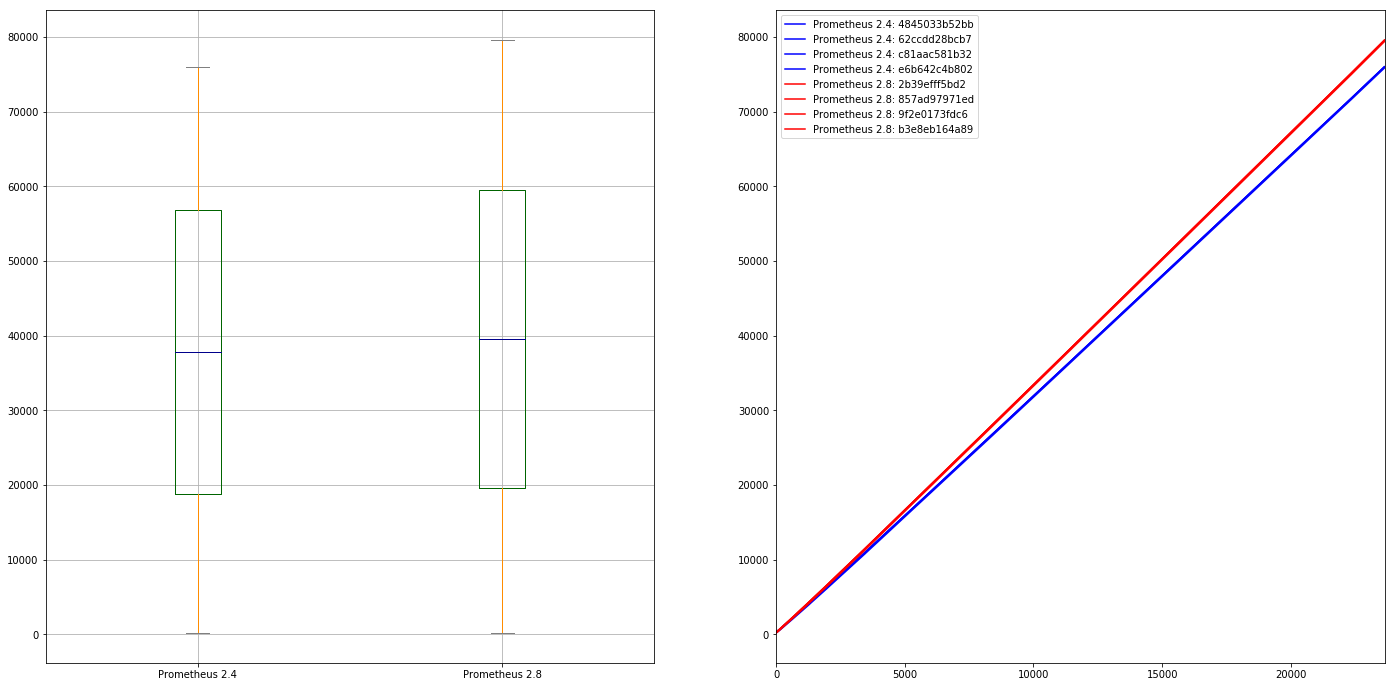

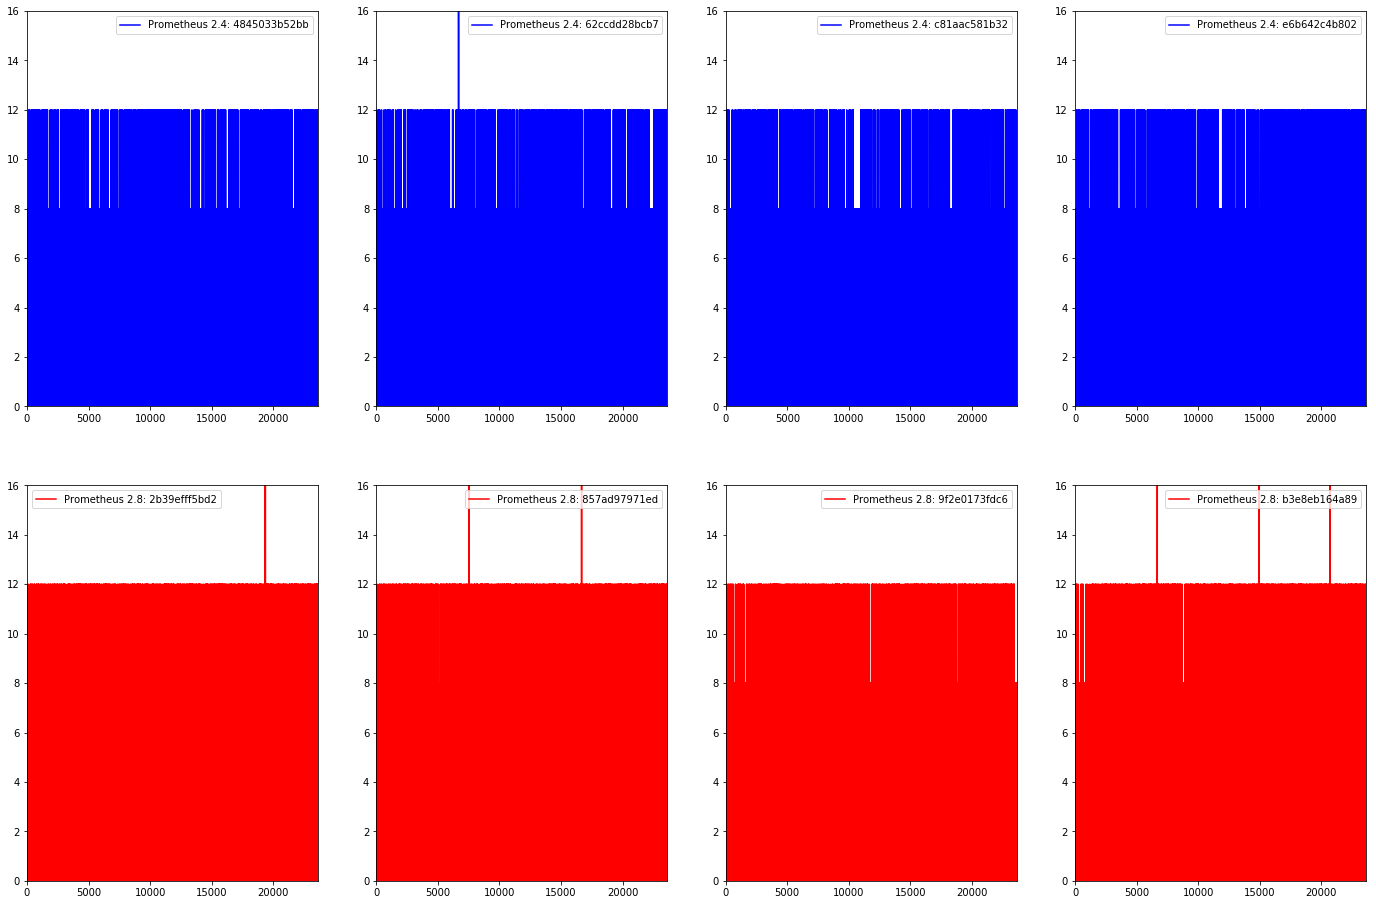

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,12))
df_boxplot2 = pd.DataFrame({'Prometheus 2.4': prometheus2_4, 'Prometheus 2.8': prometheus2_8})
df_boxplot2.plot(ax=axes[0], kind='box', color=color, sym='r+', grid=True)

for i in dict2_4:
    pd.DataFrame({i: dict2_4[i]}).plot(ax=axes[1], color='b', kind='line')

for i in dict2_8:
    pd.DataFrame({i: dict2_8[i]}).plot(ax=axes[1], color='r', kind='line')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,16))

j=0
i=0
for d in diff2_4:
    pd.DataFrame({d: diff2_4[d]}).plot(ax=axes[j,i], ylim=(0,16), color='b', kind='line')
    i += 1

j=1
i=0
for d in diff2_8:
    pd.DataFrame({d: diff2_8[d]}).plot(ax=axes[j,i], ylim=(0,16), color='r', kind='line')
    i += 1


In [12]:
def a(x, y):
    print(x, y)

def b(other, function, *args, **kwargs):
    function(*args, **kwargs)
    print(other)

b('world', a, 'hello', 'dude')

hello dude
world


In [13]:
#def compile_data()




dict2_4 = {}
diff2_4 = {}
prometheus2_4 = []
proms2_4 = []
promdiff2_4 = []
sizes2_4 = []
print("Prometheus 2.4")
for i in id2_4:
    mem = mem_usage(i)
    sizes2_4.append(len(mem))
    dict2_4['Prometheus 2.4: '+i] = mem
    proms2_4.append(mem)
    prometheus2_4.extend(mem)
    diff = []
    for x in range(1,len(mem)):
        diff.append(mem[x] - mem[x-1])
    diff2_4['Prometheus 2.4: '+str(i)] = diff
    promdiff2_4.extend(diff)


prom_mean_2_4 = []
min2_4 = np.min(sizes2_4)
for i in range(0,min2_4):
    soma = 0
    for p in proms2_4:
        soma += p[i]
    prom_mean_2_4.append(soma/len(proms2_4))
    

dict2_8 = {}
diff2_8 = {}
prometheus2_8 = []
proms2_8 = []
promdiff2_8 = []
sizes2_8 = []
print("Prometheus 2.8")
for i in id2_8:
    mem = mem_usage(i)
    sizes2_8.append(len(mem))
    dict2_8['Prometheus 2.8: '+i] = mem
    proms2_8.append(mem)
    prometheus2_8.extend(mem)
    diff = []
    for x in range(1,len(mem)):
        diff.append(mem[x] - mem[x-1])
    diff2_8['Prometheus 2.8: '+str(i)] = diff
    promdiff2_8.extend(diff)

prom_mean_2_8 = []
min2_8 = np.min(sizes2_8)
for i in range(0,min2_8):
    soma = 0
    for p in proms2_8:
        soma += p[i]
    prom_mean_2_8.append(soma/len(proms2_8))

    
print(len(prometheus2_4))
print(len(prometheus2_8))

Prometheus 2.4
Prometheus 2.8
47205
47205


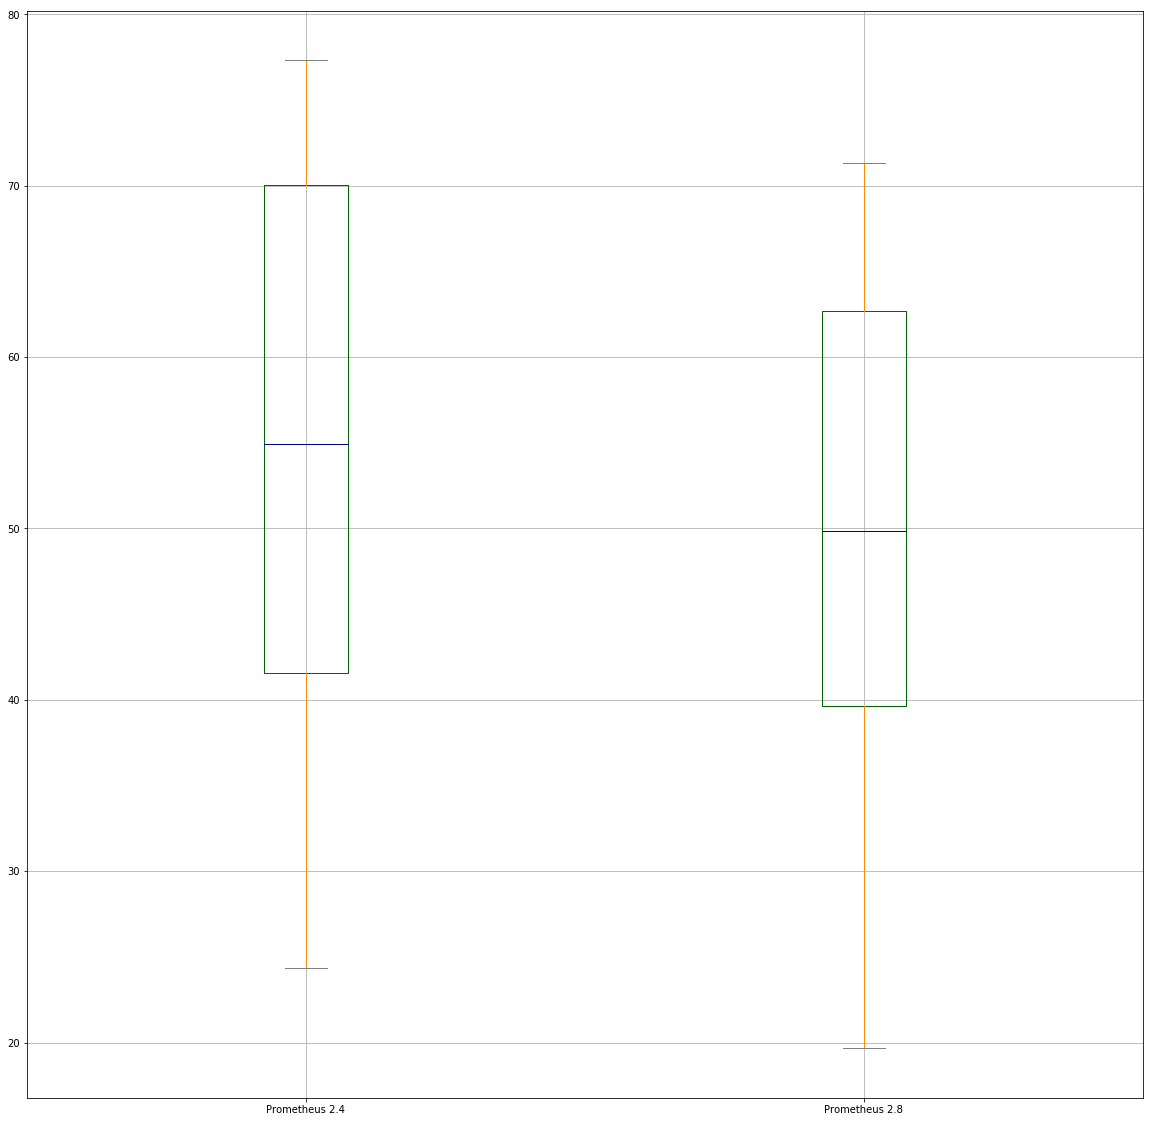

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
df_boxplot2 = pd.DataFrame({'Prometheus 2.4': prometheus2_4, 'Prometheus 2.8': prometheus2_8})
df_boxplot2.plot(ax=axes, kind='box', color=color, sym='r+', grid=True)

minimo = np.min(prometheus2_4+prometheus2_8)/1.05
maximo = np.max(prometheus2_4+prometheus2_8)*1.05


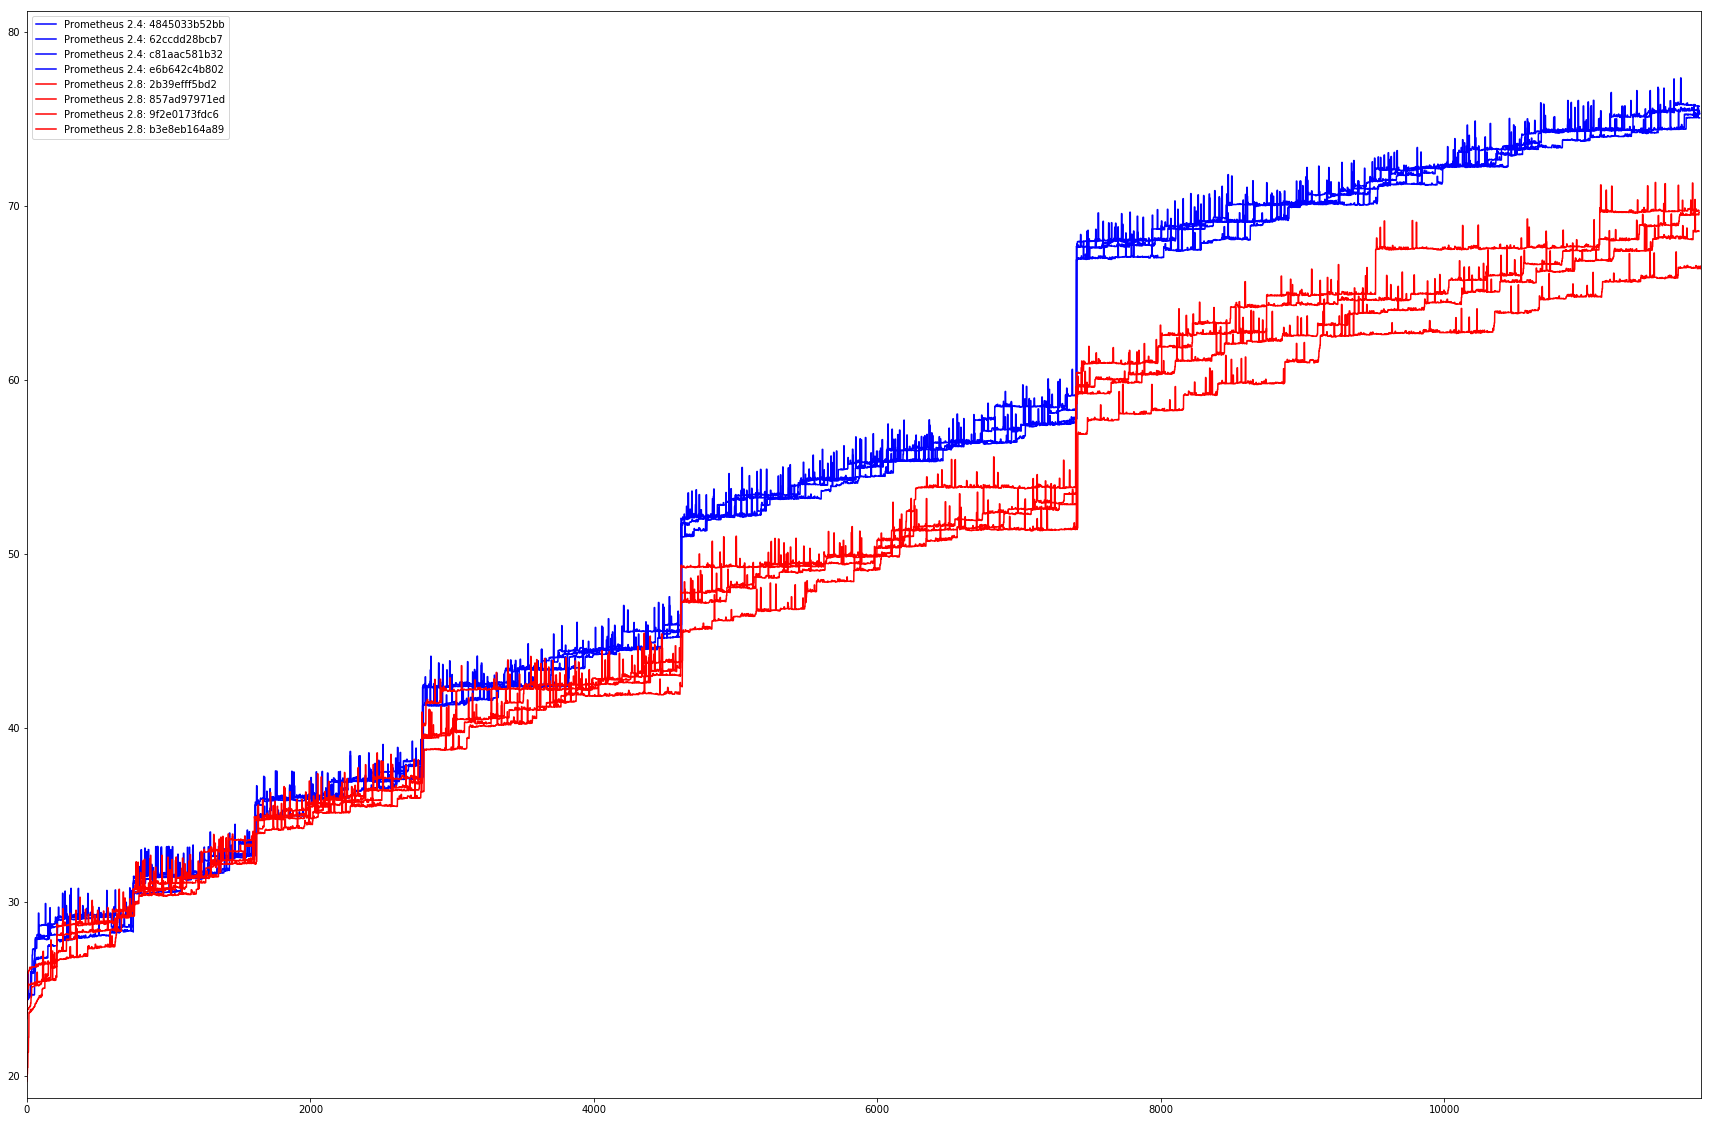

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
for d in diff2_4:
    ax = pd.DataFrame({d: dict2_4[d]}).plot(ax=axes, ylim=(minimo,maximo), color='b', kind='line')

for d in diff2_8:
    ax = pd.DataFrame({d: dict2_8[d]}).plot(ax=axes, ylim=(minimo,maximo), color='r', kind='line')




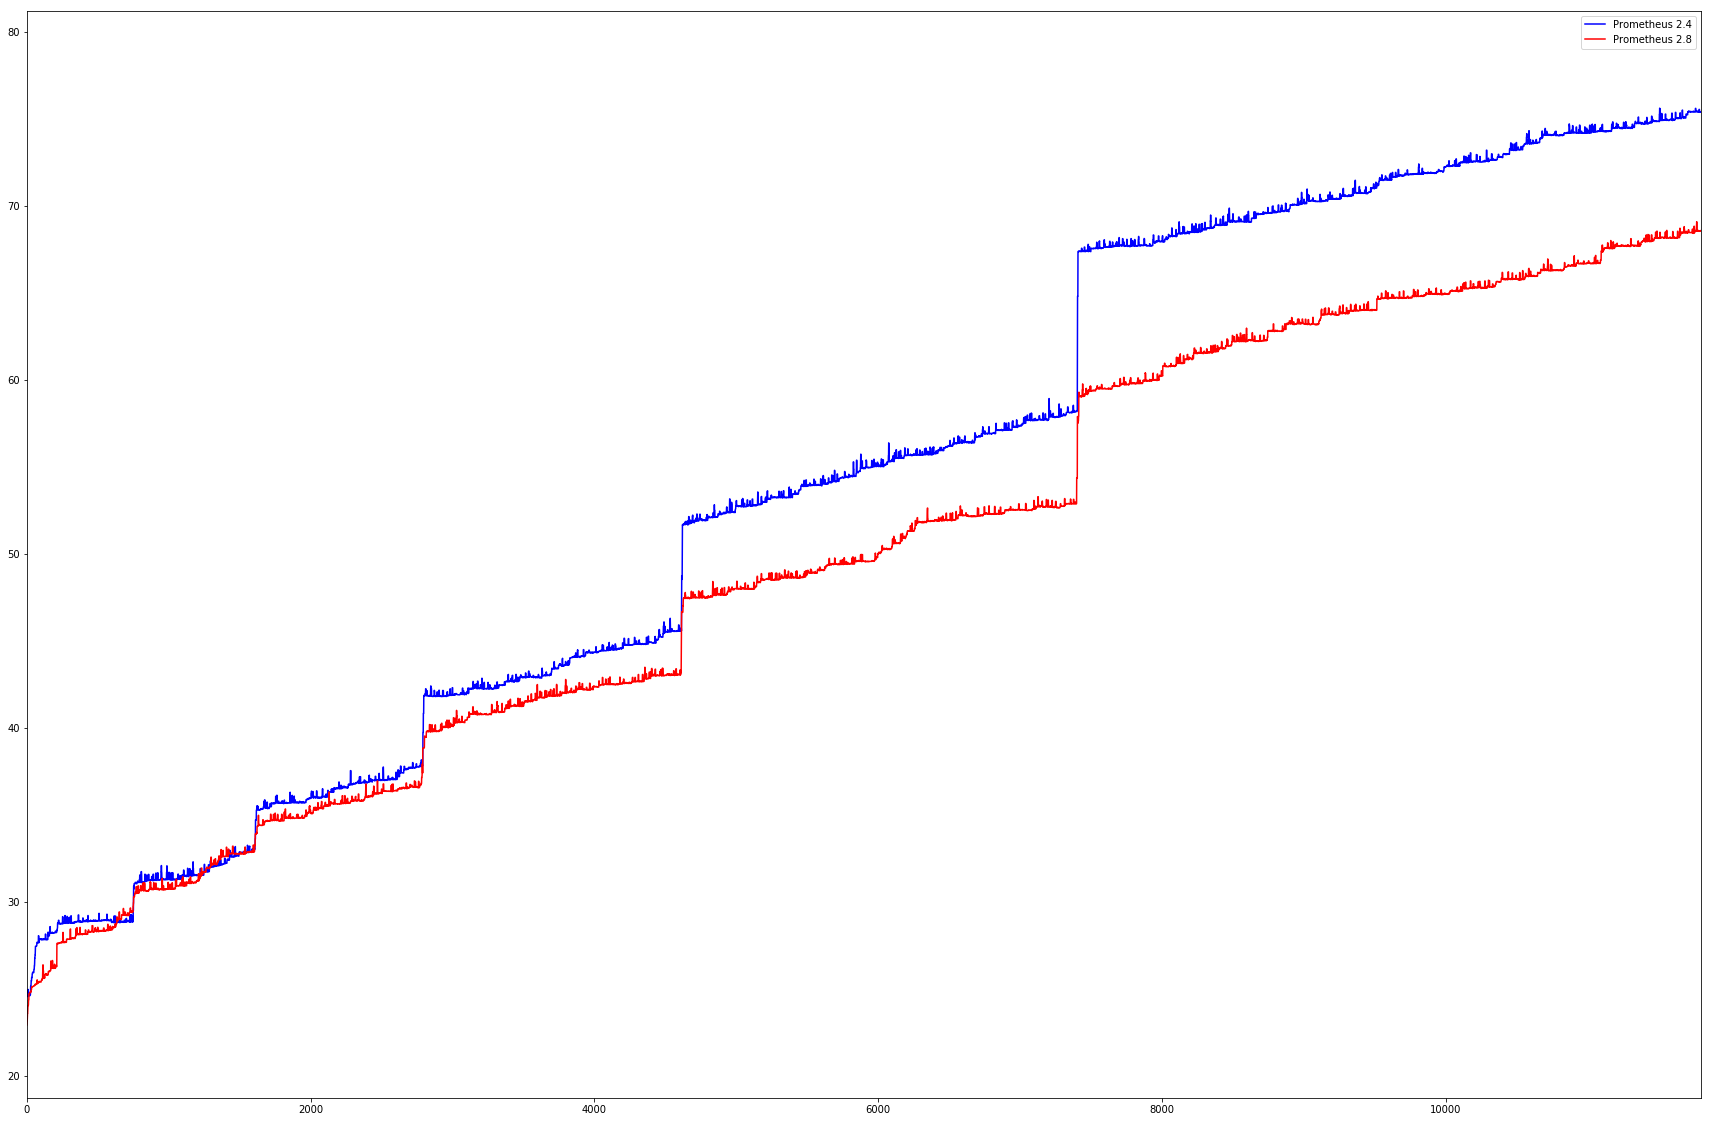

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
pd.DataFrame({'Prometheus 2.4': prom_mean_2_4}).plot(ax=axes, ylim=(minimo,maximo), color='b', kind='line')
pd.DataFrame({'Prometheus 2.8': prom_mean_2_8}).plot(ax=axes, ylim=(minimo,maximo), color='r', kind='line')



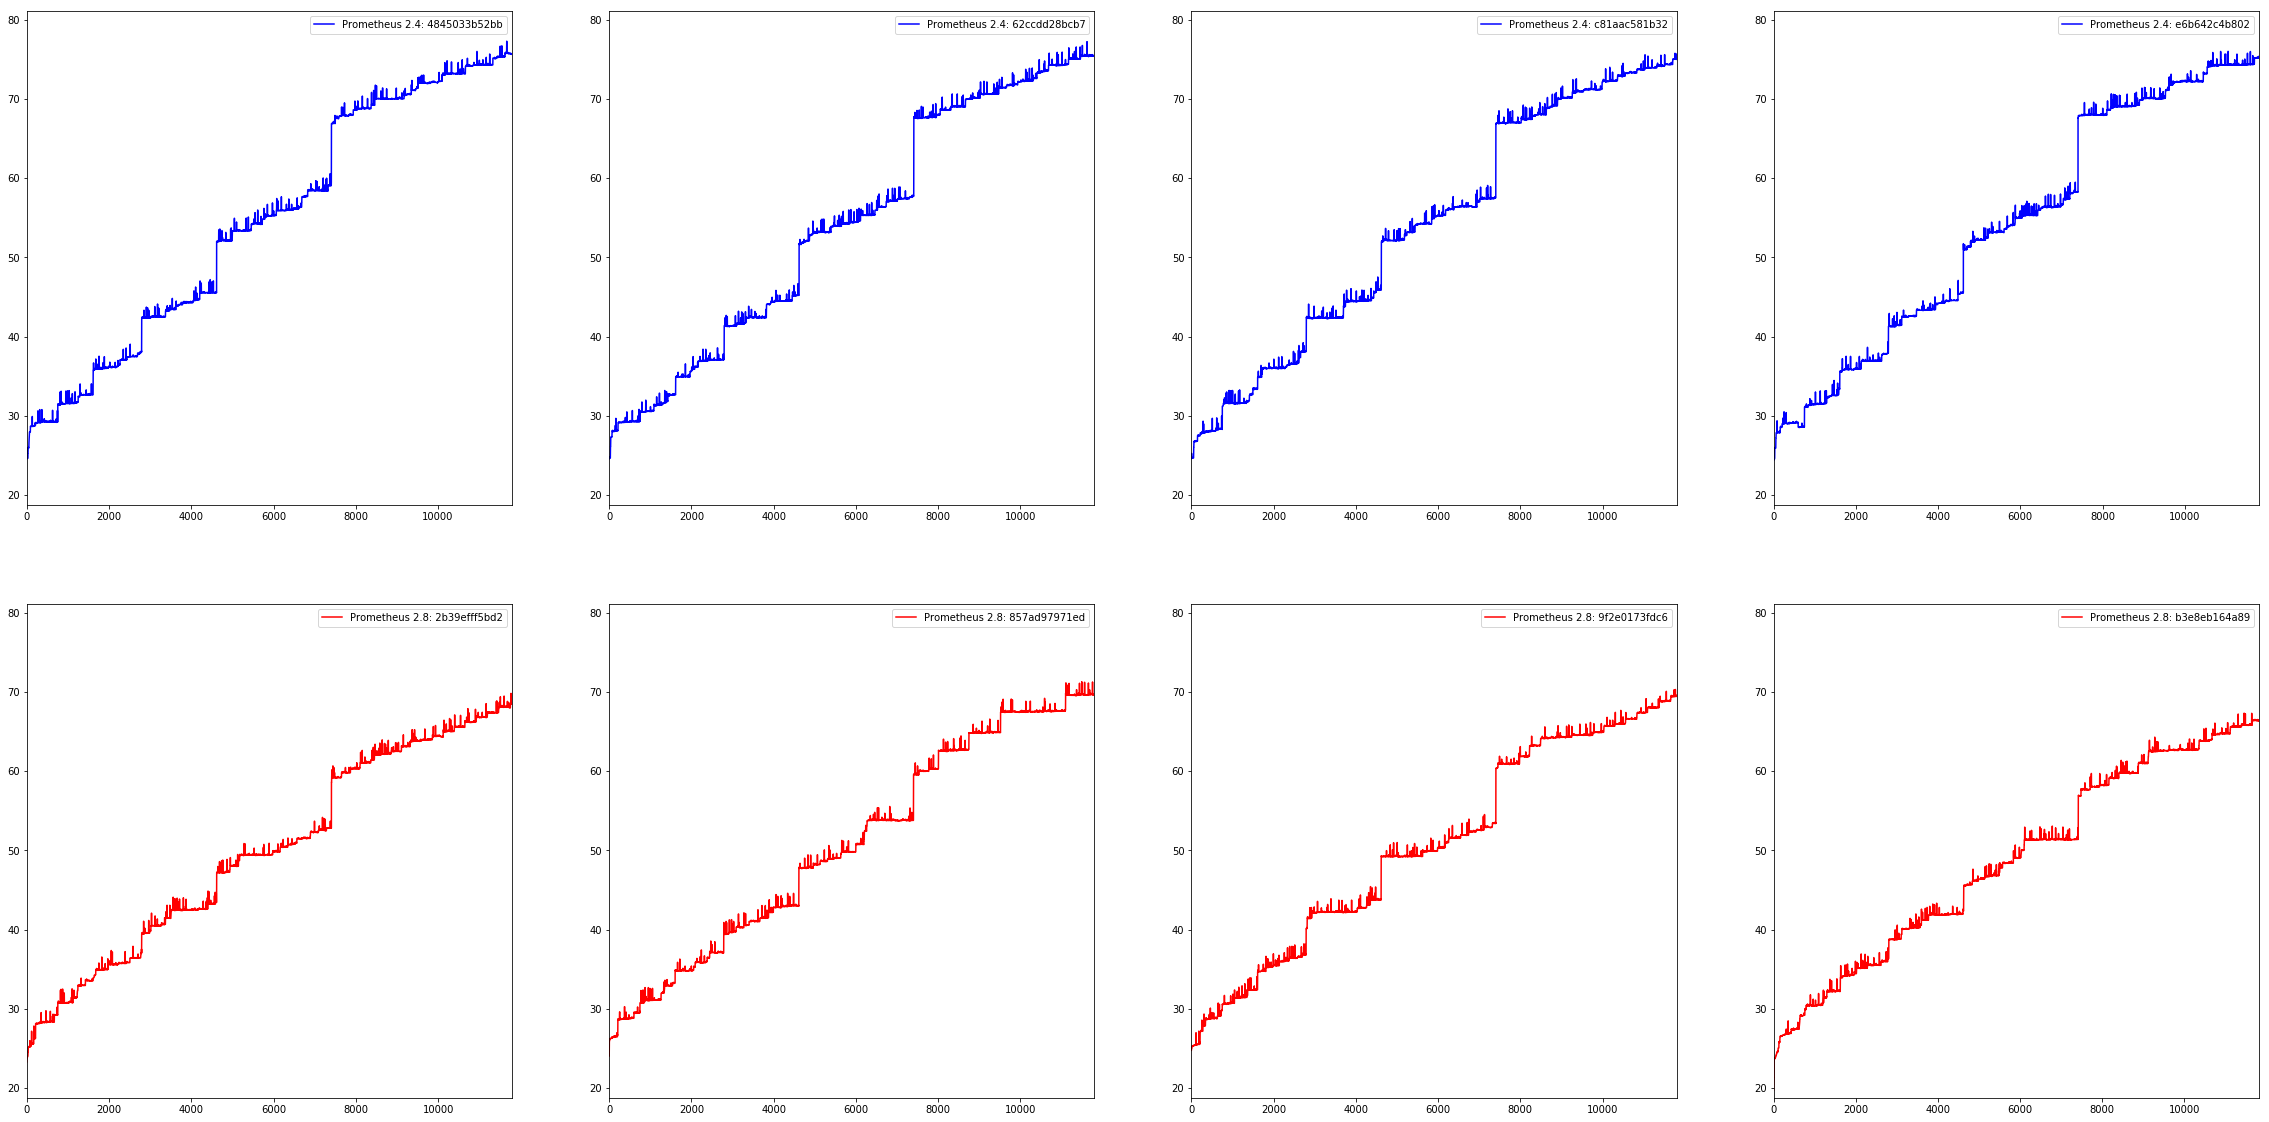

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(40,20))

j=0
i=0
for d in diff2_4:
    pd.DataFrame({d: dict2_4[d]}).plot(ax=axes[j,i], ylim=(minimo,maximo), color='b', kind='line')
    i += 1

j=1
i=0
for d in diff2_8:
    pd.DataFrame({d: dict2_8[d]}).plot(ax=axes[j,i], ylim=(minimo,maximo), color='r', kind='line')
    i += 1


0     1
1     2
2    99
dtype: int64


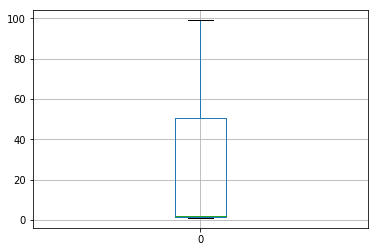

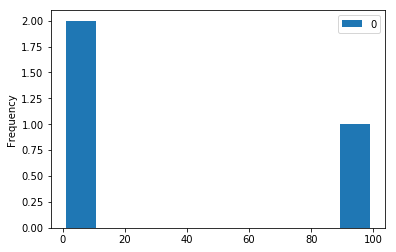

In [18]:
print(pd.Series([1,2,99]))
df = pd.DataFrame(pd.Series([1,2,99]))
plt.figure();
df.boxplot()
df.plot(kind='hist')